Importamos algunos paquetes

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image as PIL_Image
import imageio
from IPython.display import Image
import csv

Funciones auxiliares

In [15]:
def makedirs(dirname): 
    ''' 
    Crea una carpeta
    '''
    if not os.path.exists(dirname):
        os.makedirs(dirname)

def make_gif(files, gif_name, fps, size=(500, 500)):
    images = []
    for filename in files:
        with PIL_Image.open(filename) as img:
            if img is not None:
                # Resize the image
                img_resized = img.resize(size)
                images.append(np.array(img_resized))
                print(f"Tipo de dato de {filename}: {type(img_resized)}")
    
    imageio.mimsave(gif_name, images, duration=int(1000/fps))

def plot_heat(u, temporal_points, folder, freq):

    makedirs(folder)
    files = []
    x = np.linspace(0, lenght, spatial_points)
    for i in tqdm(range(temporal_points)):
        if i % freq == 0:
            plt.clf()
            plt.title(f"Temperatura para t = {i*delta_t:.3f}")
            plt.xlabel("x")
            plt.ylabel("T(x, t)")
            
            # This is to plot u_k (u at time-step k)
            plt.plot(x, u[:, i], label = 'T(t)')
            plt.plot(x, u[:, 0], 'k--', label = 'T(0)')
            plt.legend()
            # Clear the current plot figure
            plt.savefig(f"{folder}/u_{i}.png", bbox_inches = 'tight')
            file = f"{folder}/u_{i}.png"
            files.append(file)
    
    return files

Damos valores a los parámetros

In [16]:
lenght = 2
alpha = 0.5
c = 0.3
t_final = 0.1
delta_t = 1e-8
delta_x = 1e-2
iters = int(t_final/delta_t)
spatial_points = int(np.ceil(lenght/delta_x))
temporal_points = int(iters / 100000)

gamma = delta_t*alpha/(c*delta_x**2)

print(f' Nº iteraciones temporales: {iters} \n Nº puntos espaciales: {spatial_points} \n Nº puntos temporales: {temporal_points}')

 Nº iteraciones temporales: 10000000 
 Nº puntos espaciales: 200 
 Nº puntos temporales: 100


Definimos la condición inicial

In [17]:
def estado_inicial(x):
    return np.sin(x * np.pi)

estado_inicial = np.vectorize(estado_inicial)

(200,)
(200, 100)


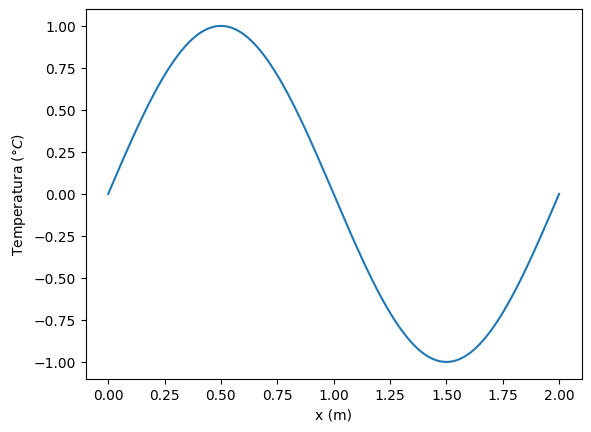

In [18]:
makedirs('figuras')

x = np.linspace(0, lenght, spatial_points)
u = np.zeros((spatial_points, temporal_points))  # u.shape = (filas = intervalos_t, columnas = intervalos_x)
u[:, 0] = estado_inicial(x)
plt.plot(x, u[:, 0])
plt.xlabel(r"x (m)")
plt.ylabel(r"Temperatura ($\degree C$)")
#plt.title("Temperatura del estado inicial")
print(u[:, 0].shape)
print(u.shape)
plt.savefig('figuras/condicion_inicial.pdf', bbox_inches = 'tight')

Imponemos las condiciones de contorno

In [19]:
# Condiciones de contorno
u[0, :] = u[0, 0]
u[-1, :] = u[-1, 0]
u

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.15685498e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.31056313e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.31056313e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.15685498e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.44929360e-16, -2.44929360e-16, -2.44929360e-16, ...,
        -2.44929360e-16, -2.44929360e-16, -2.44929360e-16]])

Definimos la función del método de diferencias finitas para este caso

In [20]:
def FDM(u):
    '''
    Calculamos el siguiente punto cada delta_t, pero solo guardamos 'temporal_points' datos, no 'iters' datos para obtener la mayor precisión
    '''
    u_viejo = u[:, 0]
    u_nuevo = np.zeros(u_viejo.shape)
    u_nuevo[0] = u[0, 0]
    u_nuevo[-1] = u[-1, 0]
    contador = 0

    for k in tqdm(range(0, iters, 1)):  # Temporal loop
        for i in range(1, spatial_points-1): # Spactial loop. El primer punto y el último nos lo saltamos
            u_nuevo[i] = u_viejo[i] + gamma * ( u_viejo[i-1] - 2*u_viejo[i] + u_viejo[i+1] ) 
            
        u_viejo = u_nuevo[:]
            
        if k%(iters//temporal_points) == 0 and k != 0:
            contador += 1
            u[:, contador] = u_nuevo


    return u

Generamos los datos

In [21]:
u = FDM(u)

  2%|▏         | 192689/10000000 [00:54<46:28, 3517.01it/s]  


KeyboardInterrupt: 

Generamos un gif de la evolución de la temperatura

100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


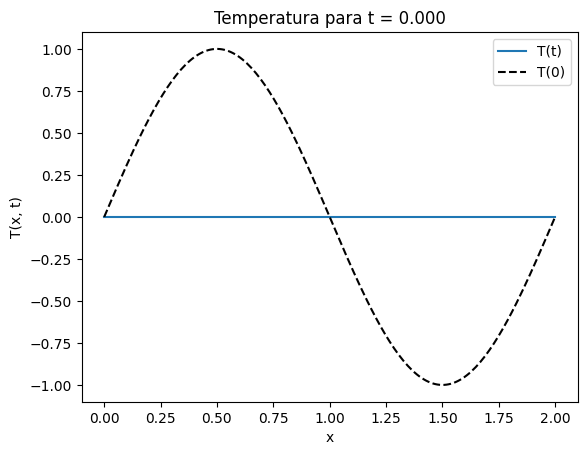

In [ ]:
files = plot_heat(u, temporal_points, "imgs", 1)
make_gif(files, gif_name='movie.gif', fps=30, size = (700, 500))
Image(url='movie.gif') 

Mostramos el gif

Tipo de dato de imgs/u_0.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_1.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_2.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_3.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_4.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_5.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_6.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_7.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_8.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_9.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_10.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_11.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_12.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_13.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_14.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_15.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_16.png: <class 'PIL.Image.Image'>
Tipo de dato de imgs/u_17.png: <class 'PI

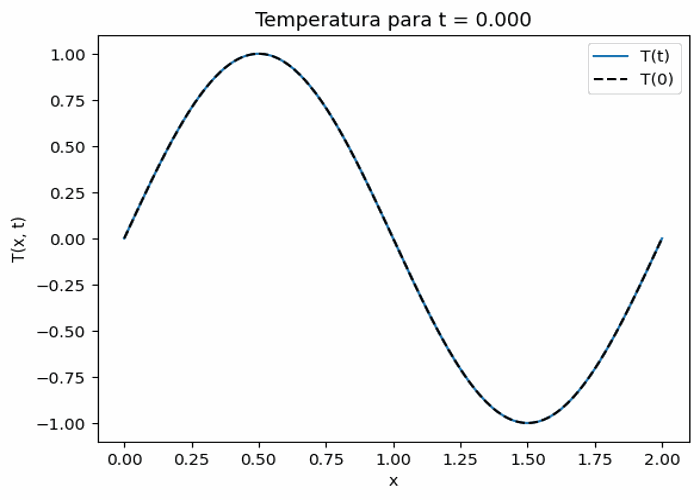

In [ ]:
display(Image(data=open("movie.gif",'rb').read(), format='png'))

Visualizamos toda la serie de datos

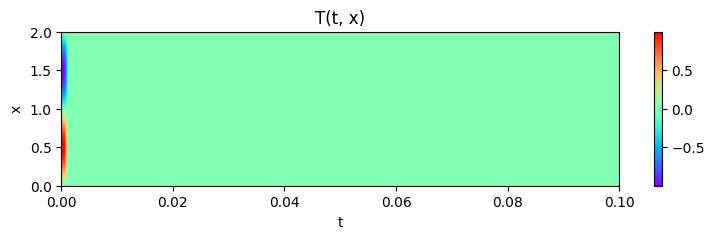

In [ ]:
x = np.linspace(0, lenght, spatial_points)

fig, ax = plt.subplots(figsize = (9, 2))
cax = ax.imshow(u, extent=[0, t_final, x.min(), x.max()], aspect='auto', origin='lower', cmap='rainbow')
# Añadir una barra de color
cbar = fig.colorbar(cax, ax=ax)

# Etiquetas y título
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(r'T(t, x)')
plt.savefig("figuras/entrenamiento_heat_equation.pdf", bbox_inches = 'tight')
plt.show()

Guardamos los datos

In [ ]:
makedirs('data')

# Nombre del archivo CSV
file_name = 'data/u_real_t_1e-8_x_1e-2.csv'

# Escribir la matriz en el archivo CSV
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(u)

print(f"Matriz guardada en {file_name}")

Matriz guardada en data/u_real_t_1e-5_x_1e-4.csv
